## Question 5

In [1]:
import numpy as np
import pandas as pd

In [165]:
## Question (1)

adf = pd.read_csv('./data/airbnb_hw.csv')
print(adf.dtypes)
print('\n')

# Price = object   --> converting the column to an integer 
adf['Price'] = adf['Price'].str.replace(',', '', regex=True)  # removing commas from Price
adf['Price'] = adf['Price'].astype(int)    # turning Price from an object to an integer
print(adf.dtypes)  # Price is now an integer 
print('\n')
print(adf.shape)


# Beds = float64
# Number of reviews = int64
# review scores rating = float64


# Removing outlier in Price because it's messing with data 

count = 0
for i in adf['Price']:
    if i > 9000:
        print(i)
        print(count)
    count += 1

# ## adjusted data frame because the outliers are causing problems with the data 
nadf = adf.drop(23927)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          floa

In [166]:
## Question (2)

# Checking for NaN values in the specified column
    # I repeated this for all the columns
    
column_name = 'Review Scores Rating'
nan_check = nadf[column_name].isna()

# Printing the rows where NaN values are present
# print(adf[nan_check])

# Price = No Nans
# Beds = 85 Rows of Nan    --> I'm just going to remove all NAs because it's not a lot

adf = nadf.dropna(subset=['Beds'])   # removing NAs
column_name = 'Beds'
nan_check = nadf[column_name].isna()

# Printing the rows where NaN values are present
# print(adf[nan_check])


# Number Of Reviews = no nans

# Review Scores Rating = 8323 rows of Nan --> I'm just going to remove all NAs because there will still be lots of data
nadf = nadf.dropna(subset=['Review Scores Rating'])   # removing NAs
column_name = 'Beds'
nan_check = nadf[column_name].isna()
print(nadf[nan_check])      # NAs removed



        Host Id  Host Since                                 Name  \
62         7338    2/2/2009   East Vil  1br in 2br apt + balcony   
142       15523    5/1/2009     Enjoy and discover New York Citi   
470       61531   12/9/2009                      Red Hook Modern   
1821     315654  12/11/2010               AUTHENTIC TRIBECA LOFT   
1885     324652  12/21/2010  Large BR+Balcony - West Village Apt   
2438     511175   4/15/2011   Room in Spacious East Village Apt.   
5105    1510220  12/16/2011              Large Bedroom in 3 Bdrm   
5842    1819245   2/27/2012       Huge Room in East Village Loft   
6493    2149806   4/16/2012       Cozy Apartment in Williamsburg   
7089    2435392   5/22/2012      huge duplex in brownstone (1bd)   
7385    2586337    6/9/2012         HUGE w/ Professional Kitchen   
7668    2733465   6/24/2012  HUGE SUNNY 1 bdrm @SoHo killer apt!   
8229    3045351   7/24/2012  Fab Furnished Bdrm in W. Vill share   
8799    3369487   8/25/2012        Cute Studio n

In [167]:
## Question (2) Price x Beds

from sklearn.cluster import KMeans

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = nadf.loc[ : , ['Price','Beds'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Preprocess the data:
Y = nadf.loc[ : , ['Price','Number Of Reviews'] ] # Select data to cluster
Y = Y.apply(maxmin) # Normalize the data

# Preprocess the data:
Z = nadf.loc[ : , ['Price','Review Scores Rating'] ] # Select data to cluster
Z = Z.apply(maxmin) # Normalize the data

Text(0.5, 1.0, 'The Data')

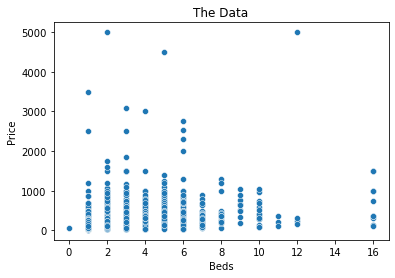

In [173]:
## Question (3)

from sklearn.cluster import KMeans

sns.scatterplot(data=nadf,x='Beds',y='Price').set_title('The Data')

Text(0.5, 1.0, 'The Data')

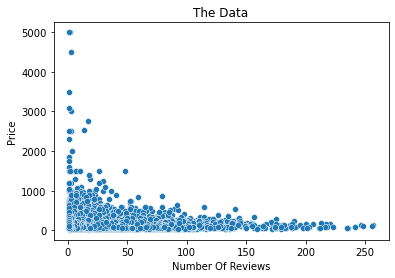

In [169]:
sns.scatterplot(data=nadf,x='Number Of Reviews',y='Price').set_title('The Data')

Text(0.5, 1.0, 'The Data')

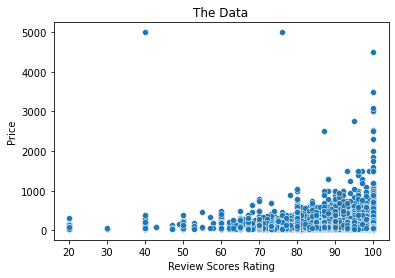

In [170]:
sns.scatterplot(data=nadf,x='Review Scores Rating',y='Price').set_title('The Data')

In [71]:
column_name = 'Beds'
nan_check = adf[column_name].isna()
print(nan_check)

# adf.loc[0:50, ['Review Scores Rating']]

0        False
1        False
2        False
3        False
4        False
         ...  
30473    False
30474    False
30475    False
30476    False
30477    False
Name: Beds, Length: 30393, dtype: bool
